In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Data Reading Process

In [2]:
data = pd.read_csv(r'data/credit_card_transactions.csv')

### Data Cleaning and Filtering

In [3]:
cols = ['Unnamed: 0', 'lat', 'long', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'merch_zipcode', 'category']
data.drop(cols, axis=1, inplace=True)

In [4]:
data.rename(columns={
    'trans_date_trans_time' : 'transaction_date',
    'cc_num' : 'card_number',
    'amt' : 'purchased_amount',
    'city_pop' : 'city_population',
    'dob' : 'date_of_birth',
    'trans_num' : 'transaction_number'
}, inplace=True)

In [5]:
data['transaction_date'] = pd.to_datetime(data['transaction_date'], dayfirst=True)
data['date_of_birth'] = pd.to_datetime(data['date_of_birth'], dayfirst=True)

In [6]:
txt = ['merchant', 'first', 'last', 'gender', 'street', 'city', 'job', 'transaction_number', 'state', 'card_number']

In [7]:
data[txt] = data[txt].astype('string')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 15 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   transaction_date    1048575 non-null  datetime64[ns]
 1   card_number         1048575 non-null  string        
 2   merchant            1048575 non-null  string        
 3   purchased_amount    1048575 non-null  float64       
 4   first               1048575 non-null  string        
 5   last                1048575 non-null  string        
 6   gender              1048575 non-null  string        
 7   street              1048575 non-null  string        
 8   city                1048575 non-null  string        
 9   state               1048575 non-null  string        
 10  zip                 1048575 non-null  int64         
 11  city_population     1048575 non-null  int64         
 12  job                 1048575 non-null  string        
 13  date_of_birt

In [9]:
data['merchant'] = data['merchant'].str.replace('fraud_', '')

In [10]:
data['full_name'] = data['first'] + ' ' + data['last']
name = data.pop('full_name')
data.insert(5, 'full_name', name)
data.drop(['first', 'last'], inplace=True, axis=1)

In [11]:
data.head()

,transaction_date,card_number,merchant,purchased_amount,full_name,gender,street,city,state,zip,city_population,job,date_of_birth,transaction_number
0,2019-01-01,2703190000000000.0,"Rippin, Kub and Mann",4.97,Jennifer Banks,F,561 Perry Cove,Moravian Falls,NC,28654,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9
1,2019-01-01,630423000000.0,"Heller, Gutmann and Zieme",107.23,Stephanie Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99
2,2019-01-01,38859500000000.0,Lind-Buckridge,220.11,Edward Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95
3,2019-01-01,3534090000000000.0,"Kutch, Hermiston and Farrell",45.00,Jeremy White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81
4,2019-01-01,375534000000000.0,Keeling-Crist,41.96,Tyler Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46


### Data Wrangling and Transformation

In [12]:
data.describe()

,transaction_date,purchased_amount,zip,city_population,date_of_birth
count,1048575,1.048575e+06,1.048575e+06,1.048575e+06,1048575
mean,2019-08-13 14:29:49.859952640,7.027910e+01,4.880159e+04,8.905776e+04,1973-09-23 10:23:35.157141776
min,2019-01-01 00:00:00,1.000000e+00,1.257000e+03,2.300000e+01,1924-10-30 00:00:00
25%,2019-05-10 00:00:00,9.640000e+00,2.623700e+04,7.430000e+02,1962-08-13 00:00:00
50%,2019-08-13 00:00:00,4.745000e+01,4.817400e+04,2.456000e+03,1975-10-11 00:00:00
75%,2019-12-01 00:00:00,8.305000e+01,7.204200e+04,2.032800e+04,1987-02-14 00:00:00
max,2020-03-10 00:00:00,2.894890e+04,9.978300e+04,2.906700e+06,2005-01-29 00:00:00
std,NaN,1.599518e+02,2.689804e+04,3.024351e+05,NaN


In [13]:
print(data['street'].nunique(),
data['city'].nunique(),
data['state'].nunique())

965 879 51


##### Data Questions We Want to Answer
 - What is the correlation of spending based on gender?
 - Who are the individuals with above mean spending in their respective city?
 - What is the ratio of credit card users to their respective city state?
 - Which age group has the highest spending scores?
 - What merchant companies are the most spent on by the users?

In [14]:
data.head()

,transaction_date,card_number,merchant,purchased_amount,full_name,gender,street,city,state,zip,city_population,job,date_of_birth,transaction_number
0,2019-01-01,2703190000000000.0,"Rippin, Kub and Mann",4.97,Jennifer Banks,F,561 Perry Cove,Moravian Falls,NC,28654,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9
1,2019-01-01,630423000000.0,"Heller, Gutmann and Zieme",107.23,Stephanie Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99
2,2019-01-01,38859500000000.0,Lind-Buckridge,220.11,Edward Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95
3,2019-01-01,3534090000000000.0,"Kutch, Hermiston and Farrell",45.00,Jeremy White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81
4,2019-01-01,375534000000000.0,Keeling-Crist,41.96,Tyler Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46


##### Gender Based Spending

In [15]:
gTransactions = data.groupby(['transaction_date', 'gender'], as_index=False)['transaction_number'].agg([
    ('number_of_transactions', 'count')
])
gTransactions['Men'] = gTransactions[gTransactions.gender == 'M']['number_of_transactions']
gTransactions['Women'] = gTransactions[gTransactions.gender == 'F']['number_of_transactions']
gTsorted = gTransactions.groupby('transaction_date', as_index=False)[['Men', 'Women']].sum()
gTsorted.set_index('transaction_date', inplace=True)
gTsorted

,Men,Women
transaction_date,,
2019-01-01,1068.0,1346.0
2019-01-02,488.0,630.0
2019-01-03,579.0,657.0
2019-01-04,658.0,816.0
2019-01-05,656.0,753.0
...,...,...
2020-03-06,861.0,1034.0
2020-03-07,885.0,1004.0
2020-03-08,1197.0,1517.0


<Axes: xlabel='transaction_date'>

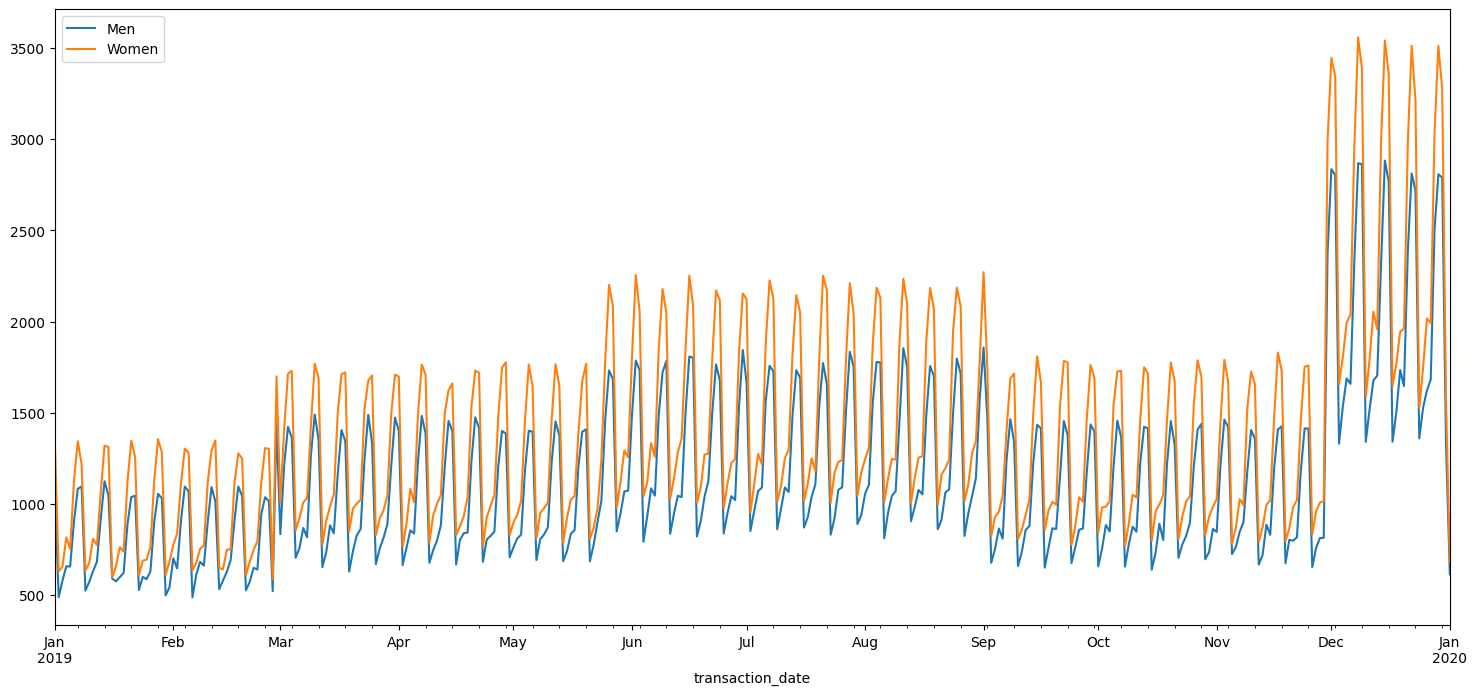

In [16]:
gTsorted.loc[: '2020-01-01'].plot(figsize=(18,8))

In [17]:
gTsorted.mean()

Men      1093.564516
Women    1322.506912
dtype: float64

In [18]:
gTsorted.loc['2019-12-02' : '2020-01-01'][gTsorted > 2500].fillna(0)

,Men,Women
transaction_date,,
2019-12-02,2804.0,3346.0
2019-12-03,0.0,0.0
2019-12-04,0.0,0.0
2019-12-05,0.0,0.0
2019-12-06,0.0,0.0
2019-12-07,0.0,2955.0
2019-12-08,2869.0,3559.0
2019-12-09,2863.0,3389.0
2019-12-10,0.0,0.0


<Axes: xlabel='transaction_date'>

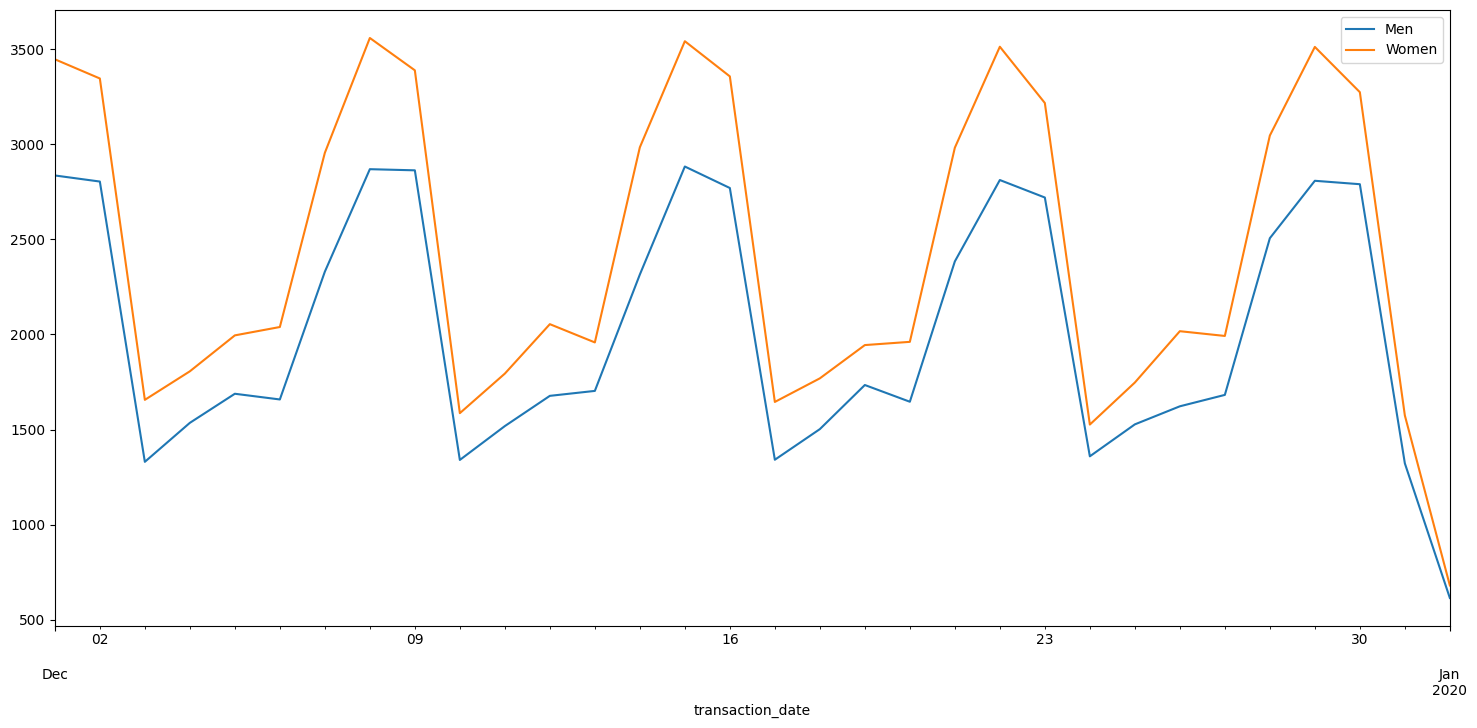

In [19]:
gTsorted.loc['2019-12-01' : '2020-01-01'].plot(figsize=(18,8))

<Axes: xlabel='transaction_date'>

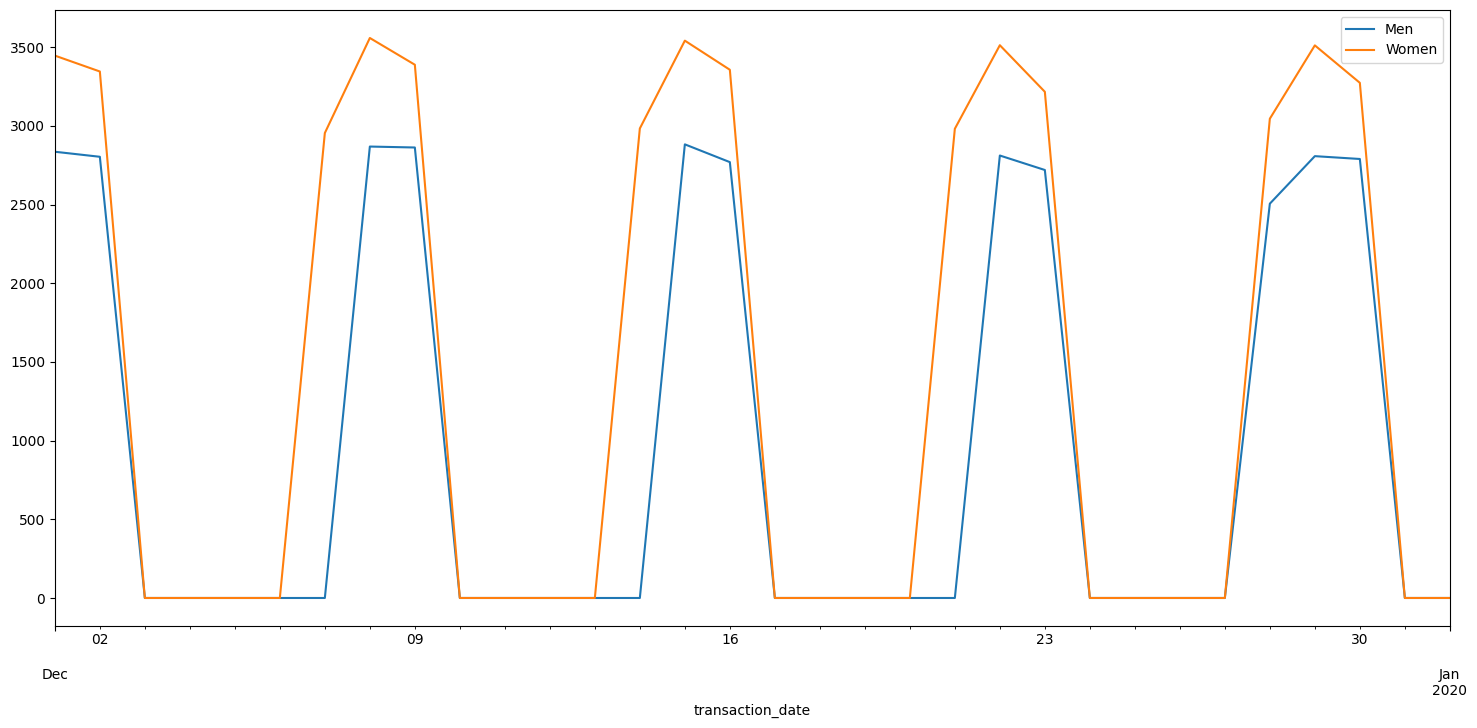

In [20]:
gTsorted.loc['2019-12-01' : '2020-01-01'][gTsorted > 2500].fillna(0).plot(figsize=(18,8))

In [21]:
gAmount = data.groupby(['transaction_date', 'gender'], as_index=False)['purchased_amount'].agg([
    ('total_amount', 'count')
])
gAmount['Men'] = gAmount[gAmount.gender == 'M'][['total_amount']]
gAmount['Women'] = gAmount[gAmount.gender == 'F'][['total_amount']]
gAsorted = gAmount.groupby('transaction_date', as_index=False)[['Men', 'Women']].sum()
gAsorted.set_index('transaction_date', inplace=True)
gAsorted

,Men,Women
transaction_date,,
2019-01-01,1068.0,1346.0
2019-01-02,488.0,630.0
2019-01-03,579.0,657.0
2019-01-04,658.0,816.0
2019-01-05,656.0,753.0
...,...,...
2020-03-06,861.0,1034.0
2020-03-07,885.0,1004.0
2020-03-08,1197.0,1517.0


<Axes: xlabel='transaction_date'>

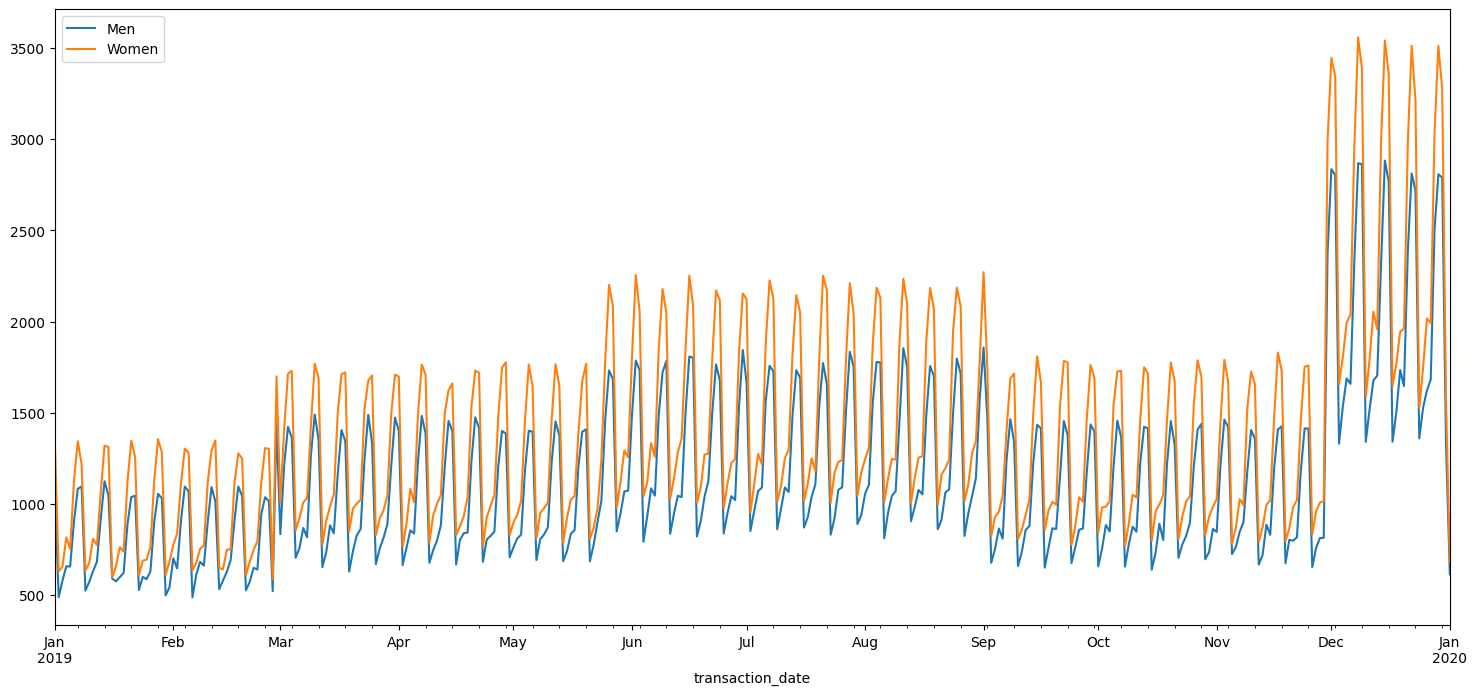

In [22]:
gAsorted.loc[: '2020-01-01'].plot(figsize=(18,8))

##### Location Mapping of Individual Spendings

In [23]:
location = data.loc[:, ['transaction_date', 'full_name', 'street', 'city', 'state', 'city_population', 'card_number', 'transaction_number', 'purchased_amount']]
location.head()

,transaction_date,full_name,street,city,state,city_population,card_number,transaction_number,purchased_amount
0,2019-01-01,Jennifer Banks,561 Perry Cove,Moravian Falls,NC,3495,2703190000000000.0,0b242abb623afc578575680df30655b9,4.97
1,2019-01-01,Stephanie Gill,43039 Riley Greens Suite 393,Orient,WA,149,630423000000.0,1f76529f8574734946361c461b024d99,107.23
2,2019-01-01,Edward Sanchez,594 White Dale Suite 530,Malad City,ID,4154,38859500000000.0,a1a22d70485983eac12b5b88dad1cf95,220.11
3,2019-01-01,Jeremy White,9443 Cynthia Court Apt. 038,Boulder,MT,1939,3534090000000000.0,6b849c168bdad6f867558c3793159a81,45.00
4,2019-01-01,Tyler Garcia,408 Bradley Rest,Doe Hill,VA,99,375534000000000.0,a41d7549acf90789359a9aa5346dcb46,41.96


In [51]:
location['full_address'] = location[['street', 'city', 'state']].agg(', '.join, axis=1)

In [50]:
address = location.pop('full_address')
location.insert(2, 'full_address', address)
location

,transaction_date,full_name,full_address,street,city,state,city_population,card_number,transaction_number,purchased_amount
0,2019-01-01,Jennifer Banks,"561 Perry Cove, Moravian Falls, NC",561 Perry Cove,Moravian Falls,NC,3495,2703190000000000.0,0b242abb623afc578575680df30655b9,4.97
1,2019-01-01,Stephanie Gill,"43039 Riley Greens Suite 393, Orient, WA",43039 Riley Greens Suite 393,Orient,WA,149,630423000000.0,1f76529f8574734946361c461b024d99,107.23
2,2019-01-01,Edward Sanchez,"594 White Dale Suite 530, Malad City, ID",594 White Dale Suite 530,Malad City,ID,4154,38859500000000.0,a1a22d70485983eac12b5b88dad1cf95,220.11
3,2019-01-01,Jeremy White,"9443 Cynthia Court Apt. 038, Boulder, MT",9443 Cynthia Court Apt. 038,Boulder,MT,1939,3534090000000000.0,6b849c168bdad6f867558c3793159a81,45.00
4,2019-01-01,Tyler Garcia,"408 Bradley Rest, Doe Hill, VA",408 Bradley Rest,Doe Hill,VA,99,375534000000000.0,a41d7549acf90789359a9aa5346dcb46,41.96
...,...,...,...,...,...,...,...,...,...,...
1048570,2020-03-10,Haley Wagner,"05561 Farrell Crescent, Annapolis, MD",05561 Farrell Crescent,Annapolis,MD,92106,6011980000000000.0,45ecd198c65e81e597db22e8d2ef7361,77.00
1048571,2020-03-10,Meredith Campbell,"043 Hanson Turnpike, Hedrick, IA",043 Hanson Turnpike,Hedrick,IA,1583,4839040000000000.0,c00ce51c6ebb7657474a77b9e0b51f34,116.94
1048572,2020-03-10,Susan Mills,"005 Cody Estates, Louisville, KY",005 Cody Estates,Louisville,KY,736284,571844000000.0,17c9dc8b2a6449ca2473726346e58e6c,21.27
1048573,2020-03-10,Julia Bell,"576 House Crossroad, West Sayville, NY",576 House Crossroad,West Sayville,NY,4056,4.64685e+18,5ca650881b48a6a38754f841c23b77ab,9.52


In [73]:
location.groupby(['full_name', 'full_address'], as_index=False)['card_number'].agg([
    ('cards_owned', 'nunique')
]).sort_values(by='cards_owned', ascending=False)

,full_name,full_address,cards_owned
0,Aaron Murray,"624 Hale Springs Apt. 572, Meadville, MO",1
604,Lisa Lopez,"32343 Saunders Course, Dongola, IL",1
636,Martin Ford,"56812 Francis Courts, Corriganville, MD",1
637,Mary Diaz,"9886 Anita Drive, Fort Washakie, WY",1
638,Mary Golden,"4407 Lisa Course, West Frankfort, IL",1
...,...,...,...
326,Gary Hall,"69085 Short Shores, Allentown, NY",1
327,Gary Martinez,"03512 Jackson Ports, Reno, NV",1
328,George Floyd,"22502 Baker Mount Suite 241, Hazel, KY",1
329,George Smith,"7377 Walton Extensions Apt. 979, Dallas, TX",1


In [123]:
location.groupby(['full_address'], as_index=False)['transaction_number'].nunique().sort_values(by='transaction_number', ascending=False)


,full_address,transaction_number
462,"4664 Sanchez Common Suite 930, Bradley, SC",2566
833,"854 Walker Dale Suite 488, Bowdoin, ME",2559
298,"29606 Martinez Views Suite 653, Hinesburg, VT",2542
283,"2870 Bean Terrace Apt. 756, Thomas, WV",2532
790,"8030 Beck Motorway, Moorhead, MS",2531
...,...,...
275,"27954 Hall Mill Suite 575, San Antonio, TX",7
494,"4940 Donald Throughway Apt. 219, Vacaville, CA",7
510,"5124 Wendy Skyway Suite 154, Karns City, PA",7
690,"7065 Whitney Mountains, Chattanooga, TN",7


In [92]:
topLpurchase = location.groupby(['full_address'], as_index=False)['transaction_number'].nunique().sort_values(by='transaction_number', ascending=False).iloc[:10]
topLpurchase

,full_address,transaction_number
462,"4664 Sanchez Common Suite 930, Bradley, SC",2566
833,"854 Walker Dale Suite 488, Bowdoin, ME",2559
298,"29606 Martinez Views Suite 653, Hinesburg, VT",2542
283,"2870 Bean Terrace Apt. 756, Thomas, WV",2532
790,"8030 Beck Motorway, Moorhead, MS",2531
410,"40624 Rebecca Spurs, De Witt, AR",2529
590,"594 Berry Lights Apt. 392, Wilmington, NC",2525
799,"8172 Robertson Parkways Suite 072, Superior, AZ",2522
6,"0069 Robin Brooks Apt. 695, Elberta, MI",2521
566,"574 David Locks Suite 207, Cottekill, NY",2518


In [91]:
topLamount = location.groupby(['full_address'], as_index=False)['purchased_amount'].sum().sort_values(by='purchased_amount', ascending=False).iloc[:10]
topLamount

,full_address,purchased_amount
410,"40624 Rebecca Spurs, De Witt, AR",236878.41
156,"1652 James Mews, Hinckley, OH",236057.67
878,"899 Michele View Suite 960, Philadelphia, PA",230548.67
506,"50872 Alex Plain Suite 088, Baton Rouge, LA",230432.81
343,"3379 Williams Common, Littleton, CO",227530.46
590,"594 Berry Lights Apt. 392, Wilmington, NC",226513.67
26,"03030 White Lakes, Grandview, TX",225371.68
169,"17666 David Valleys, Sun City, CA",225278.49
237,"2481 Mills Lock, Plainfield, NJ",224944.45
295,"2924 Bobby Trafficway, Sebring, FL",224832.06


In [94]:
topLocation = topLpurchase[topLpurchase.full_address.isin(topLamount.full_address)]
topLocation

,full_address,transaction_number
410,"40624 Rebecca Spurs, De Witt, AR",2529
590,"594 Berry Lights Apt. 392, Wilmington, NC",2525


In [108]:
topLcustomers = location[location.full_address.isin(topLocation.full_address)][['full_name', 'full_address', 'transaction_number', 'purchased_amount']]
topLocCus = topLcustomers.groupby(['full_name', 'full_address'], as_index=False).agg({
    'transaction_number' : 'count',
    'purchased_amount' : 'sum'
}).rename(columns={'transaction_number' : 'number_of_transactions', 'purchased_amount' : 'total_amount'})
topLocCus

,full_name,full_address,number_of_transactions,total_amount
0,Allison Allen,"40624 Rebecca Spurs, De Witt, AR",2529,236878.41
1,Rebecca Erickson,"594 Berry Lights Apt. 392, Wilmington, NC",2525,226513.67


##### Credit Card Owners to City Population Ratio

In [165]:
cardOwners = location.groupby(['city', 'city_population'], as_index=False)['full_name'].agg([
    ('card_owners_in_city', 'nunique')
]).sort_values(by='card_owners_in_city', ascending=False)
cardOwners['owners:city_pop ratio'] = (cardOwners.card_owners_in_city / cardOwners.city_population) * 100
cardOwners

,city,city_population,card_owners_in_city,owners:city_pop ratio
205,Dallas,1263321,5,0.000396
371,Houston,2906700,4,0.000138
578,New York City,1577385,4,0.000254
224,Detroit,673342,4,0.000594
568,Naples,276002,3,0.001087
...,...,...,...,...
314,Great Mills,5927,1,0.016872
315,Greenbush,776,1,0.128866
316,Greendale,13973,1,0.007157
317,Greenport,4299,1,0.023261


##### Listing of Usage of Credit Card According to Prefered Merchants

In [176]:
merchants = pd.merge(data, location, how='left')
merch = merchants.pop('full_address')
merchants.insert(6, 'full_address', merch)
merchants = merchants.loc[:,['transaction_date', 'full_name', 'full_address', 'merchant', 'transaction_number', 'purchased_amount']]
merchants.head()

,transaction_date,full_name,full_address,merchant,transaction_number,purchased_amount
0,2019-01-01,Jennifer Banks,"561 Perry Cove, Moravian Falls, NC","Rippin, Kub and Mann",0b242abb623afc578575680df30655b9,4.97
1,2019-01-01,Stephanie Gill,"43039 Riley Greens Suite 393, Orient, WA","Heller, Gutmann and Zieme",1f76529f8574734946361c461b024d99,107.23
2,2019-01-01,Edward Sanchez,"594 White Dale Suite 530, Malad City, ID",Lind-Buckridge,a1a22d70485983eac12b5b88dad1cf95,220.11
3,2019-01-01,Jeremy White,"9443 Cynthia Court Apt. 038, Boulder, MT","Kutch, Hermiston and Farrell",6b849c168bdad6f867558c3793159a81,45.00
4,2019-01-01,Tyler Garcia,"408 Bradley Rest, Doe Hill, VA",Keeling-Crist,a41d7549acf90789359a9aa5346dcb46,41.96


In [195]:
merchants.groupby(['full_name', 'full_address', 'merchant'], as_index=False).agg({
    'transaction_number' : 'count',
    'purchased_amount' : 'sum'
}).rename(columns={'transaction_number' : 'times_ordered', 'purchased_amount' : 'total_cost'})

,full_name,full_address,merchant,times_ordered,total_cost
0,Aaron Murray,"624 Hale Springs Apt. 572, Meadville, MO",Abbott-Rogahn,3,222.13
1,Aaron Murray,"624 Hale Springs Apt. 572, Meadville, MO",Abbott-Steuber,1,73.59
2,Aaron Murray,"624 Hale Springs Apt. 572, Meadville, MO",Abernathy and Sons,6,355.73
3,Aaron Murray,"624 Hale Springs Apt. 572, Meadville, MO",Abshire PLC,2,146.88
4,Aaron Murray,"624 Hale Springs Apt. 572, Meadville, MO","Adams, Kovacek and Kuhlman",1,54.24
...,...,...,...,...,...
444240,Zachary Boone,"3703 Benson Wells, Palmyra, NY",Zboncak LLC,1,108.09
444241,Zachary Boone,"3703 Benson Wells, Palmyra, NY",Zboncak Ltd,1,45.23
444242,Zachary Boone,"3703 Benson Wells, Palmyra, NY","Zboncak, Rowe and Murazik",1,1.34
444243,Zachary Boone,"3703 Benson Wells, Palmyra, NY","Zieme, Bode and Dooley",1,45.32


In [201]:
merchants.groupby('merchant', as_index=False).agg({
    'transaction_number' : 'count',
    'purchased_amount' : 'sum'
}).rename(columns={'transaction_number' : 'number_of_orders', 'purchased_amount' : 'total_amount'}).sort_values(by='total_amount', ascending=False)

,merchant,number_of_orders,total_amount
316,Kilback LLC,3521,315126.61
73,Bradtke PLC,2051,243705.81
146,Doyle Ltd,2065,242994.01
217,Hackett-Lueilwitz,2093,242382.19
468,Pacocha-O'Reilly,2068,241536.89
...,...,...,...
242,Heller-Abshire,688,37635.68
464,Ortiz Group,716,37498.57
479,Pfeffer LLC,694,37046.92
18,Bahringer-Larson,676,36356.03


In [198]:
merchants.purchased_amount.sum()

73692902.08000003

##### Sorting Spending Indications by Age Categories

In [227]:
ageData = data.loc[:,['transaction_date', 'full_name', 'date_of_birth', 'merchant', 'transaction_number', 'purchased_amount']]
ageData

,transaction_date,full_name,date_of_birth,merchant,transaction_number,purchased_amount
0,2019-01-01,Jennifer Banks,1988-03-09,"Rippin, Kub and Mann",0b242abb623afc578575680df30655b9,4.97
1,2019-01-01,Stephanie Gill,1978-06-21,"Heller, Gutmann and Zieme",1f76529f8574734946361c461b024d99,107.23
2,2019-01-01,Edward Sanchez,1962-01-19,Lind-Buckridge,a1a22d70485983eac12b5b88dad1cf95,220.11
3,2019-01-01,Jeremy White,1967-01-12,"Kutch, Hermiston and Farrell",6b849c168bdad6f867558c3793159a81,45.00
4,2019-01-01,Tyler Garcia,1986-03-28,Keeling-Crist,a41d7549acf90789359a9aa5346dcb46,41.96
...,...,...,...,...,...,...
1048570,2020-03-10,Haley Wagner,1943-05-28,Fadel Inc,45ecd198c65e81e597db22e8d2ef7361,77.00
1048571,2020-03-10,Meredith Campbell,1999-06-28,"Cremin, Hamill and Reichel",c00ce51c6ebb7657474a77b9e0b51f34,116.94
1048572,2020-03-10,Susan Mills,1952-04-02,"O'Connell, Botsford and Hand",17c9dc8b2a6449ca2473726346e58e6c,21.27
1048573,2020-03-10,Julia Bell,1990-06-25,Thompson-Gleason,5ca650881b48a6a38754f841c23b77ab,9.52


In [228]:
ageData['age'] = (ageData['transaction_date'] - ageData['date_of_birth']) / 365
ageData['age'] = ageData['age'].dt.days.astype('int16')
ageData

,transaction_date,full_name,date_of_birth,merchant,transaction_number,purchased_amount,age
0,2019-01-01,Jennifer Banks,1988-03-09,"Rippin, Kub and Mann",0b242abb623afc578575680df30655b9,4.97,30
1,2019-01-01,Stephanie Gill,1978-06-21,"Heller, Gutmann and Zieme",1f76529f8574734946361c461b024d99,107.23,40
2,2019-01-01,Edward Sanchez,1962-01-19,Lind-Buckridge,a1a22d70485983eac12b5b88dad1cf95,220.11,56
3,2019-01-01,Jeremy White,1967-01-12,"Kutch, Hermiston and Farrell",6b849c168bdad6f867558c3793159a81,45.00,52
4,2019-01-01,Tyler Garcia,1986-03-28,Keeling-Crist,a41d7549acf90789359a9aa5346dcb46,41.96,32
...,...,...,...,...,...,...,...
1048570,2020-03-10,Haley Wagner,1943-05-28,Fadel Inc,45ecd198c65e81e597db22e8d2ef7361,77.00,76
1048571,2020-03-10,Meredith Campbell,1999-06-28,"Cremin, Hamill and Reichel",c00ce51c6ebb7657474a77b9e0b51f34,116.94,20
1048572,2020-03-10,Susan Mills,1952-04-02,"O'Connell, Botsford and Hand",17c9dc8b2a6449ca2473726346e58e6c,21.27,67
1048573,2020-03-10,Julia Bell,1990-06-25,Thompson-Gleason,5ca650881b48a6a38754f841c23b77ab,9.52,29


In [229]:
ageData['age_category'] = pd.cut(x=ageData['age'], bins=[0,10,20,30,40,100], labels=['infant', 'teens', 'young_aduls', 'middle_aged', 'old']) 
ageData

,transaction_date,full_name,date_of_birth,merchant,transaction_number,purchased_amount,age,age_category
0,2019-01-01,Jennifer Banks,1988-03-09,"Rippin, Kub and Mann",0b242abb623afc578575680df30655b9,4.97,30,young_aduls
1,2019-01-01,Stephanie Gill,1978-06-21,"Heller, Gutmann and Zieme",1f76529f8574734946361c461b024d99,107.23,40,middle_aged
2,2019-01-01,Edward Sanchez,1962-01-19,Lind-Buckridge,a1a22d70485983eac12b5b88dad1cf95,220.11,56,old
3,2019-01-01,Jeremy White,1967-01-12,"Kutch, Hermiston and Farrell",6b849c168bdad6f867558c3793159a81,45.00,52,old
4,2019-01-01,Tyler Garcia,1986-03-28,Keeling-Crist,a41d7549acf90789359a9aa5346dcb46,41.96,32,middle_aged
...,...,...,...,...,...,...,...,...
1048570,2020-03-10,Haley Wagner,1943-05-28,Fadel Inc,45ecd198c65e81e597db22e8d2ef7361,77.00,76,old
1048571,2020-03-10,Meredith Campbell,1999-06-28,"Cremin, Hamill and Reichel",c00ce51c6ebb7657474a77b9e0b51f34,116.94,20,teens
1048572,2020-03-10,Susan Mills,1952-04-02,"O'Connell, Botsford and Hand",17c9dc8b2a6449ca2473726346e58e6c,21.27,67,old
1048573,2020-03-10,Julia Bell,1990-06-25,Thompson-Gleason,5ca650881b48a6a38754f841c23b77ab,9.52,29,young_aduls


In [230]:
ageData.groupby('age_category', as_index=False).agg({
    'transaction_number' : 'count',
    'purchased_amount' : 'sum'
}).rename(columns={'transaction_number' : 'number_of_transactions', 'purchased_amount' : 'total_amount'}).sort_values(by='total_amount', ascending=False)

C:\Users\Matthew\AppData\Local\Temp\ipykernel_26888\1529051296.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ageData.groupby('age_category', as_index=False).agg({


,age_category,number_of_transactions,total_amount
4,old,594733,40941343.72
3,middle_aged,233168,17450406.73
2,young_aduls,178924,12702294.11
1,teens,41750,2598857.52
0,infant,0,0.00


In [237]:
ageData.groupby(['age_category', 'merchant'], as_index=False)['purchased_amount'].sum().sort_values(by='purchased_amount', ascending=False).iloc[:10]

C:\Users\Matthew\AppData\Local\Temp\ipykernel_26888\2223849029.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ageData.groupby(['age_category', 'merchant'], as_index=False)['purchased_amount'].sum().sort_values(by='purchased_amount', ascending=False).iloc[:10]


,age_category,merchant,purchased_amount
3088,old,Kilback LLC,188729.40
2919,old,DuBuque LLC,146747.42
3344,old,"Schumm, Bauch and Ondricka",145009.72
3238,old,"Osinski, Ledner and Leuschke",144727.73
3266,old,Rau and Sons,144222.07
3167,old,"Lockman, West and Runte",144007.06
3013,old,"Heller, Gutmann and Zieme",143449.56
3101,old,Koepp-Witting,142860.80
3187,old,McDermott-Weimann,142789.20
3240,old,Pacocha-O'Reilly,142300.63
